In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

from VariableLengthPreprocess import WindowsPreprocess
from BinaryClassification.crf_models.CRFModel import CRFModel

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
dataset_folder="/Volumes/Tesi/WindowsBuild/extracted_x64/"
folds = 3

In [3]:
crf = CRFModel(
    verbose=False,
    max_iter=10,
)

In [4]:
%%time
tl = WindowsPreprocess()
X, y, paths = tl.preprocess(dataset_folder, sample_size=9)

/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


CPU times: user 4.72 s, sys: 887 ms, total: 5.61 s
Wall time: 6.7 s


In [5]:
param_space = [{
    'lookahead': [x],
    'lookbehind': [x],
} for x in range(0, 9)]

gs = GridSearchCV(
    crf,
    param_space,
    cv=folds,
    n_jobs=1,
    verbose=3,
    refit=False,
)

gs.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] lookahead=0, lookbehind=0 .......................................
[CV]  lookahead=0, lookbehind=0, score=0.990977338039158, total=  43.0s
[CV] lookahead=0, lookbehind=0 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.5s remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, score=0.9896899681699575, total=  38.7s
[CV] lookahead=0, lookbehind=0 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, score=0.9899153054200537, total=  43.4s
[CV] lookahead=1, lookbehind=1 .......................................
[CV]  lookahead=1, lookbehind=1, score=0.9977687342627369, total=  54.8s
[CV] lookahead=1, lookbehind=1 .......................................
[CV]  lookahead=1, lookbehind=1, score=0.9961600448167444, total=  49.9s
[CV] lookahead=1, lookbehind=1 .......................................
[CV]  lookahead=1, lookbehind=1, score=0.9967867703246963, total=  56.0s
[CV] lookahead=2, lookbehind=2 .......................................
[CV]  lookahead=2, lookbehind=2, score=0.9993336010944031, total= 1.1min
[CV] lookahead=2, lookbehind=2 .......................................
[CV]  lookahead=2, lookbehind=2, score=0.9990970560750152, total=  57.1s
[CV] lookahead=2, lookbehind=2 .......................................
[CV]  lookahead=2, lookbehind=2, score=0.9984285348119188, total= 1.1min
[CV] lookahead=3, lookbehind=3 ................................

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 42.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=CRFModel(C=1, lookahead=0, lookbehind=0, max_iter=10, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'lookahead': [0], 'lookbehind': [0]}, {'lookahead': [1], 'lookbehind': [1]}, {'lookahead': [2], 'lookbehind': [2]}, {'lookahead': [3], 'lookbehind': [3]}, {'lookahead': [4], 'lookbehind': [4]}, {'lookahead': [5], 'lookbehind': [5]}, {'lookahead': [6], 'lookbehind': [6]}, {'lookahead': [7], 'lookbehind': [7]}, {'lookahead': [8], 'lookbehind': [8]}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
cv_df = pd.DataFrame(gs.cv_results_)
cv_df.to_csv('grid_search.csv')

# Visualize
cv_df.sort_values(by='rank_test_score')

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
4      73.103671         4.808686         0.999431          0.999449   
7     117.345512         8.984068         0.999420          0.999405   
3      75.785449         4.456722         0.999419          0.999414   
5      79.794593         5.763066         0.999391          0.999407   
6     104.075305         8.275163         0.999353          0.999376   
8     101.308141         8.654221         0.999349          0.999375   
2      58.881476         2.850639         0.998953          0.999012   
1      51.714435         1.868401         0.996905          0.996943   
0      40.911217         0.798368         0.990194          0.990194   

  param_lookahead param_lookbehind                             params  \
4               4                4  {'lookahead': 4, 'lookbehind': 4}   
7               7                7  {'lookahead': 7, 'lookbehind': 7}   
3               3                3  {'lookahead': 3, 'lookbehind': 3}   
5               5                5  {'lookahead': 5, 'lookbehind': 5}   
6               6                6  {'lookahead': 6, 'lookbehind': 6}   
8               8                8  {'lookahead': 8, 'lookbehind': 8}   
2               2                2  {'lookahead': 2, 'lookbehind': 2}   
1               1                1  {'lookahead': 1, 'lookbehind': 1}   
0               0                0  {'lookahead': 0, 'lookbehind': 0}   

   rank_test_score  split0_test_score  split0_train_score  split1_test_score  \
4                1           0.999585            0.999447           0.999321   
7                2           0.999536            0.999343           0.999404   
3                3           0.999546            0.999347           0.999354   
5                4           0.999551            0.999386           0.999318   
6                5           0.999542            0.999385           0.999265   
8                6           0.999534            0.999372           0.999299   
2                7           0.999334            0.999115           0.999097   
1                8           0.997769            0.996735           0.996160   
0                9           0.990977            0.989806           0.989690   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
4            0.999444           0.999386            0.999457      4.544220   
7            0.999466           0.999319            0.999406      6.736144   
3            0.999456           0.999357            0.999439      8.494629   
5            0.999441           0.999304            0.999395      4.701756   
6            0.999392           0.999251            0.999351      7.694197   
8            0.999420           0.999212            0.999332      6.245311   
2            0.999275           0.998429            0.998647      3.539794   
1            0.996913           0.996787            0.997181      2.802610   
0            0.990447           0.989915            0.990329      2.229616   

   std_score_time  std_test_score  std_train_score  
4        0.496924        0.000112         0.000006  
7        1.517699        0.000089         0.000050  
3        0.764609        0.000090         0.000048  
5        0.609223        0.000113         0.000024  
6        0.883163        0.000134         0.000018  
8        0.916842        0.000136         0.000036  
2        0.233952        0.000383         0.000266  
1        0.149935        0.000662         0.000184  
0        0.074189        0.000561         0.000278

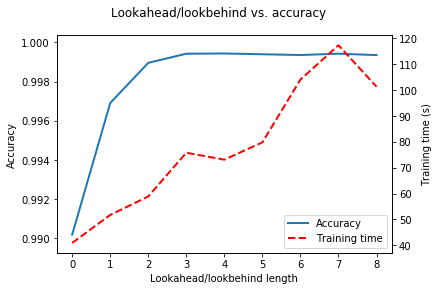

In [7]:
import matplotlib.ticker

# Read from CSV (we don't have to recompute)
cv_df = pd.read_csv('grid_search.csv')

params = cv_df['param_lookahead'].values.astype('int')
scores = cv_df['mean_test_score'].values
scores_std = cv_df['std_test_score'].values
fit_time = cv_df['mean_fit_time'].values

fig, ax = plt.subplots()
fig.suptitle('Lookahead/lookbehind vs. accuracy')

accuracy_line = ax.plot(params, scores, linewidth=2.0, label='Accuracy')
ax.set_xlabel('Lookahead/lookbehind length')
ax.set_ylabel('Accuracy')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.margins(0.1) # to visualize the tick for accuracy=1.0

ax2 = ax.twinx()
time_line = ax2.plot(params, fit_time, 'r--', linewidth=2.0, label='Training time')
ax2.set_ylabel('Training time (s)')

lns = accuracy_line + time_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

fig.savefig('figures/hyperparam_codediscovery_variable.pdf', bbox_inches='tight')